In [1]:
import dos
from IPython.display import Image
path = './dos/Integrated_HR_static'

INFO:DOS:Reading config from ./dos/Integrated_HR_static/dos.yaml
INFO:DOS:New driver: M1
INFO:M1:New input: Txyz
INFO:M1:New input: Rxyz
INFO:M1:New input: modes
INFO:M1:No inputs!
INFO:DOS:New driver: M2
INFO:M2:New input: Txyz
INFO:M2:New input: Rxyz
INFO:M2:No inputs!
INFO:DOS:New driver: wfs48
INFO:wfs48:No inputs!
INFO:wfs48:New output: M12_RBM
INFO:wfs48:Output logged in!
INFO:DOS:New driver: AcO_controller
INFO:AcO_controller:New input: x_hat
INFO:AcO_controller:New output: M1 TxyzRxyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M2 Txyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M2 Rxyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M1 BM
INFO:AcO_controller:Output logged in!
INFO:DOS:New driver: M1Pos0
INFO:M1Pos0:New input: TxyzRxyz
INFO:M1Pos0:New output: M1Pos_DeltaF
INFO:M1Pos0:Output logged in!
INFO:DOS:New driver: Mount
INFO:Mount:New input: MountFeedback_1
INFO:Mount:New input: MountFeedback_2
IN

SIMCEO server received: Acknowledging connection from SIMCEO client!


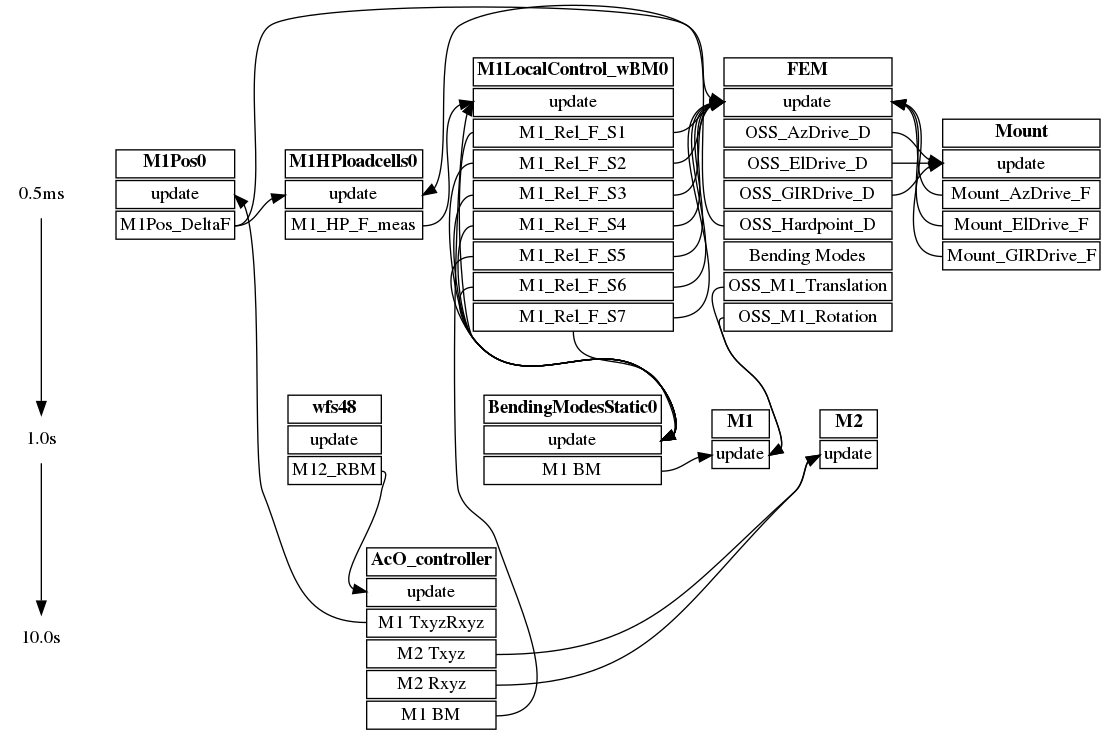

In [2]:
# init
sim = dos.DOS(path, 20, show_timing = 2)
Image(filename=path + '/timing.png')

In [3]:
sim.start()

INFO:DOS:Pushing configuration to server
INFO:M1:GMT
INFO:M2:GMT
INFO:wfs48:OP0
INFO:FEM:FEM
INFO:DOS:Initializing
INFO:M1:None
INFO:M2:None
INFO:wfs48:None
INFO:FEM:None
INFO:DOS:Running


In [10]:
sim.pctComplete

96

In [11]:
sim.join()
sim.terminate()

logs = sim.logs.entries

INFO:DOS:Terminating
INFO:M1:GMT deleted!
INFO:M2:GMT deleted!
INFO:wfs48:OpticalPath deleted!
INFO:FEM:FEM deleted
INFO:DOS:Terminating


Elapsed time: 449.2366123199463


In [12]:
# Save
import pickle


with open('./logs/Integrated_HR_static.sclogs', 'wb') as f:
    pickle.dump(sim.logs.entries, f)
    logs = sim.logs.entries

"""
# Load
logs = pickle.load( open( './logs/Integrated_HR_static.sclogs', "rb" ) )
""";

# plot logs
---

In [13]:
import matplotlib.pyplot as plt
try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

import numpy as np

try:
    duration = sim.cfg['simulation']['duration']
except NameError:
    duration = logs['FEM']['OSS_AzDrive_D'].timeSeries[0][-1]
    
xticks = np.arange(0, duration + 1, duration/ 10)

logs

{'wfs48': {'M12_RBM': <dos.dos.Entry at 0x7fd492087b90>},
 'AcO_controller': {'M1 TxyzRxyz': <dos.dos.Entry at 0x7fd4920871d0>,
  'M2 Txyz': <dos.dos.Entry at 0x7fd49209ac50>,
  'M2 Rxyz': <dos.dos.Entry at 0x7fd492087a10>,
  'M1 BM': <dos.dos.Entry at 0x7fd4920a2ed0>},
 'M1Pos0': {'M1Pos_DeltaF': <dos.dos.Entry at 0x7fd492031a50>},
 'Mount': {'Mount_AzDrive_F': <dos.dos.Entry at 0x7fd492031c10>,
  'Mount_ElDrive_F': <dos.dos.Entry at 0x7fd492089190>,
  'Mount_GIRDrive_F': <dos.dos.Entry at 0x7fd492089390>},
 'M1HPloadcells0': {'M1_HP_F_meas': <dos.dos.Entry at 0x7fd492089c50>},
 'BendingModesStatic0': {'M1 BM': <dos.dos.Entry at 0x7fd492092410>},
 'FEM': {'OSS_AzDrive_D': <dos.dos.Entry at 0x7fd492092850>,
  'OSS_ElDrive_D': <dos.dos.Entry at 0x7fd492092ed0>,
  'OSS_GIRDrive_D': <dos.dos.Entry at 0x7fd492092590>,
  'OSS_Hardpoint_D': <dos.dos.Entry at 0x7fd492092e10>,
  'Bending Modes': <dos.dos.Entry at 0x7fd492092f50>,
  'OSS_M1_Translation': <dos.dos.Entry at 0x7fd49209e490>,
  'OS

In [14]:
time_1 = logs['FEM']['OSS_AzDrive_D'].timeSeries[0]
time_2000 = logs['wfs48']['M12_RBM'].timeSeries[0]
time_50000 = logs['AcO_controller']['M1 BM'].timeSeries[0]

AcO_ref = logs['AcO_controller']['M1 TxyzRxyz'].timeSeries[1]
FEM_Txyz = logs['FEM']['OSS_M1_Translation'].timeSeries[1]
FEM_Rxyz = logs['FEM']['OSS_M1_Rotation'].timeSeries[1]

Mount_Az = logs['Mount']['Mount_AzDrive_F'].timeSeries[1]
Mount_El = logs['Mount']['Mount_ElDrive_F'].timeSeries[1]
Mount_GIR = logs['Mount']['Mount_GIRDrive_F'].timeSeries[1]

FEM_Az = logs['FEM']['OSS_AzDrive_D'].timeSeries[1]
FEM_El = logs['FEM']['OSS_ElDrive_D'].timeSeries[1]
FEM_GIR = logs['FEM']['OSS_GIRDrive_D'].timeSeries[1]

HP_F = logs['M1Pos0']['M1Pos_DeltaF'].timeSeries[1]

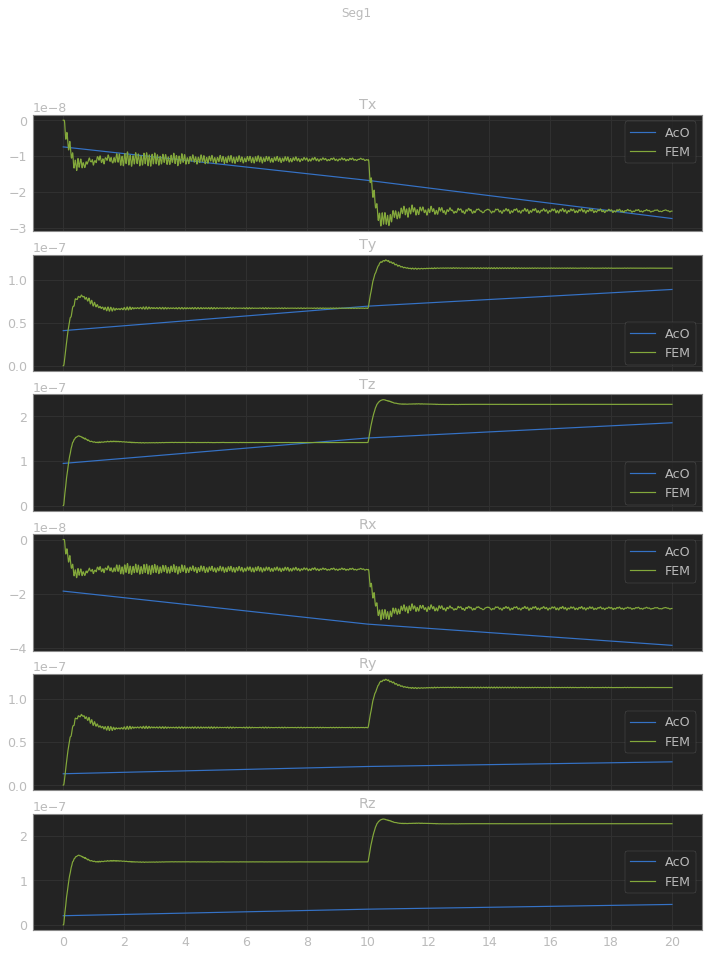

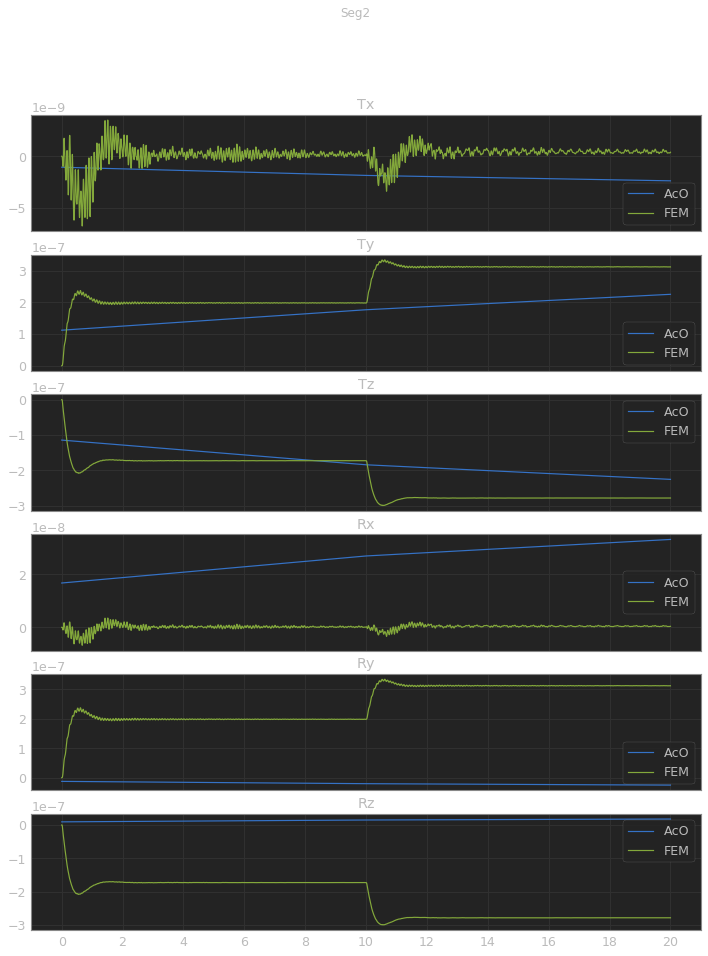

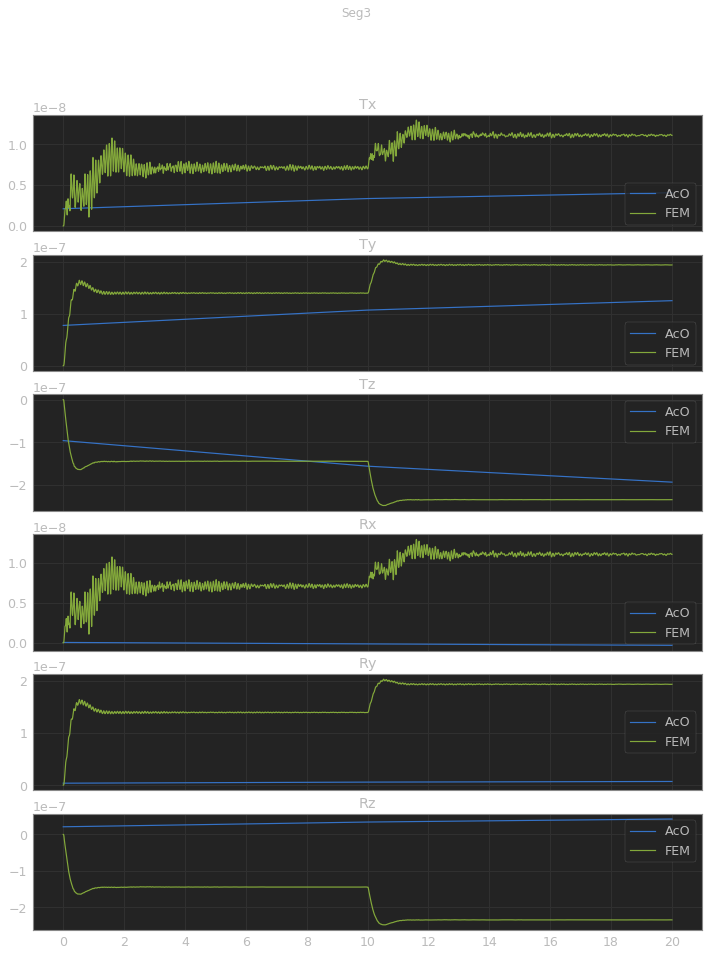

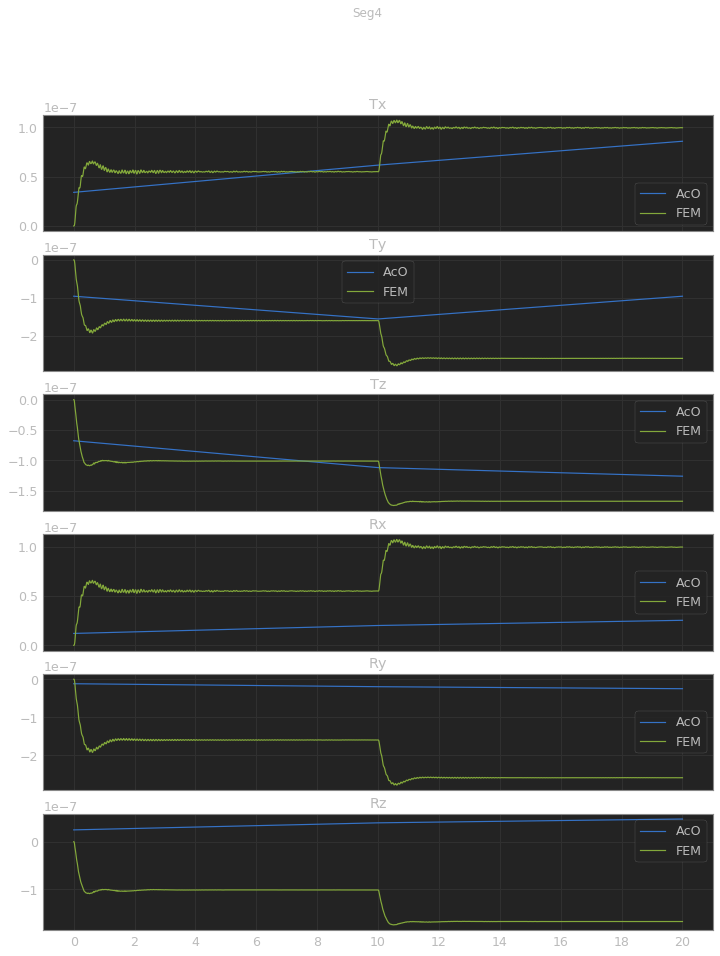

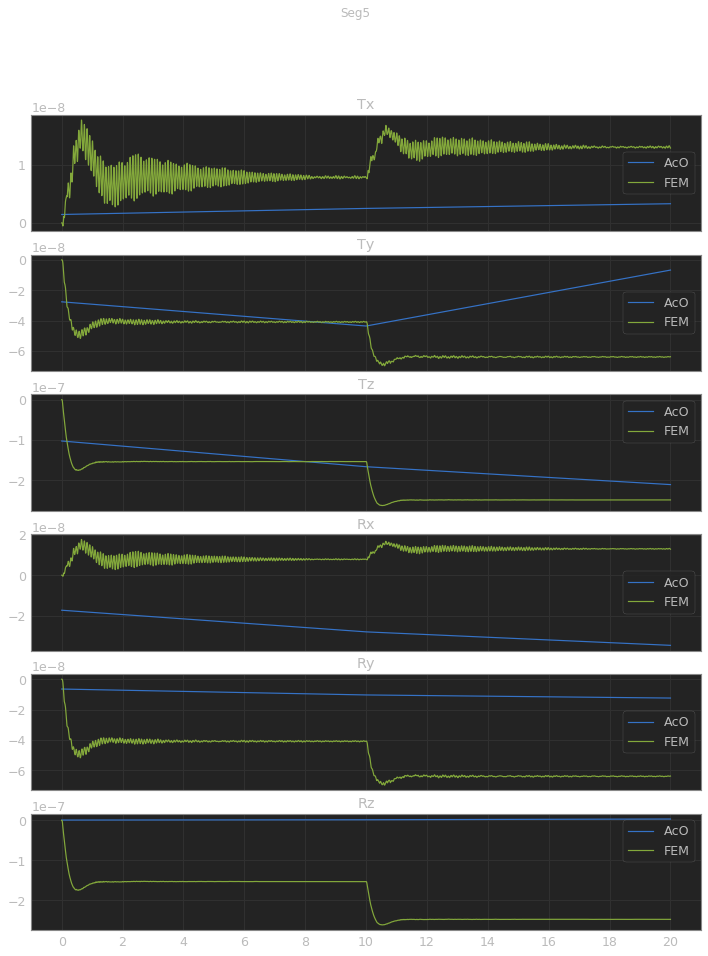

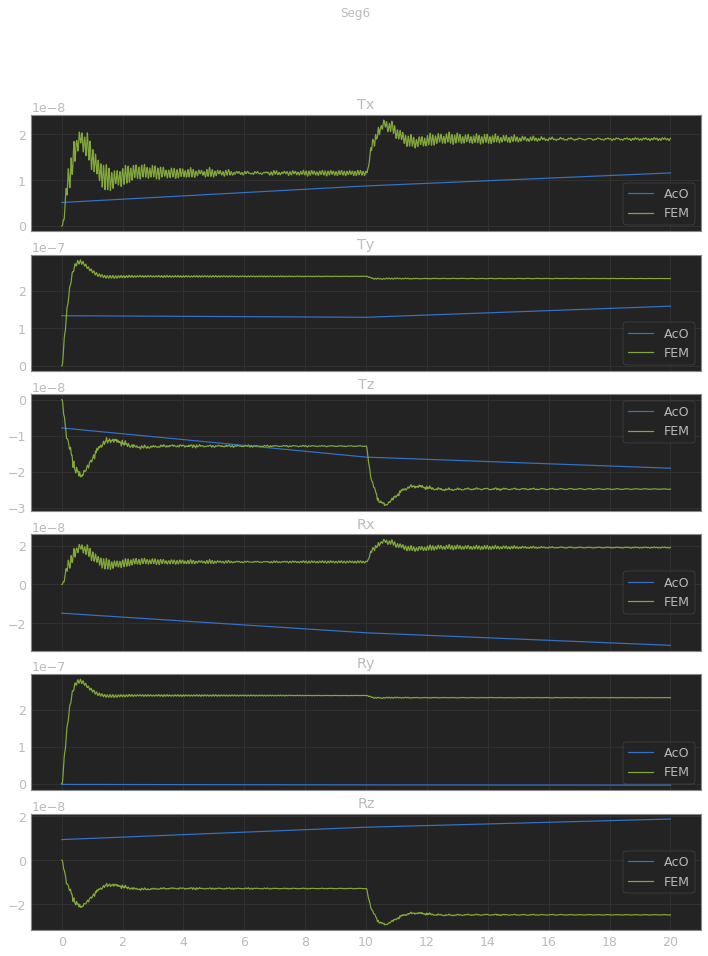

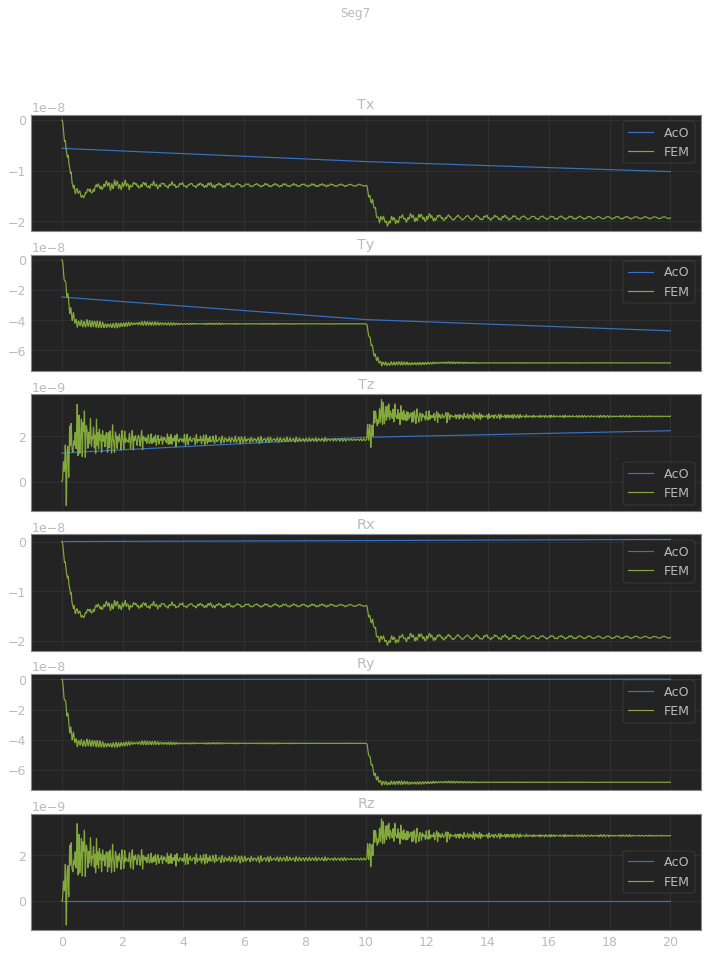

In [15]:
seg = list(range(7))
TRxyz = list(range(6))
rbm_str = ['Tx','Ty','Tz','Rx','Ry','Rz']
for s in seg:
    fig, ax = plt.subplots(6, 1, sharex=True, figsize=(12,15))
    fig.suptitle('Seg'  + str(s + 1), fontsize=12, horizontalalignment = 'center',
                verticalalignment = 'top')
    for rbm in TRxyz:
        ax[rbm].plot(time_1[::20000], AcO_ref[s,rbm,:], label = 'AcO')
        #ax[rbm].plot(time_1, FEM_out[:,s * 6  + rbm], label = 'FEM')
        if rbm <3:
            ax[rbm].plot(time_1, FEM_Txyz[s,rbm, :], label = 'FEM')
        else:
            ax[rbm].plot(time_1, FEM_Txyz[s,rbm - 3, :], label = 'FEM')
        ax[rbm].set_xticks(xticks)
        ax[rbm].set_title(rbm_str[rbm])
        ax[rbm].legend(loc="best")
    plt.show()

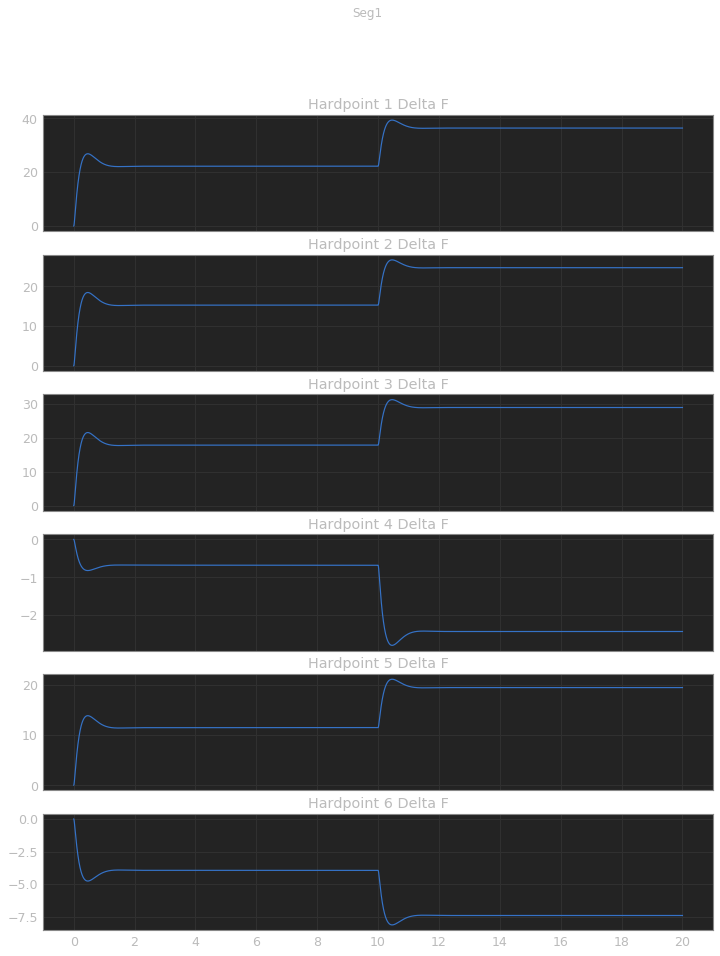

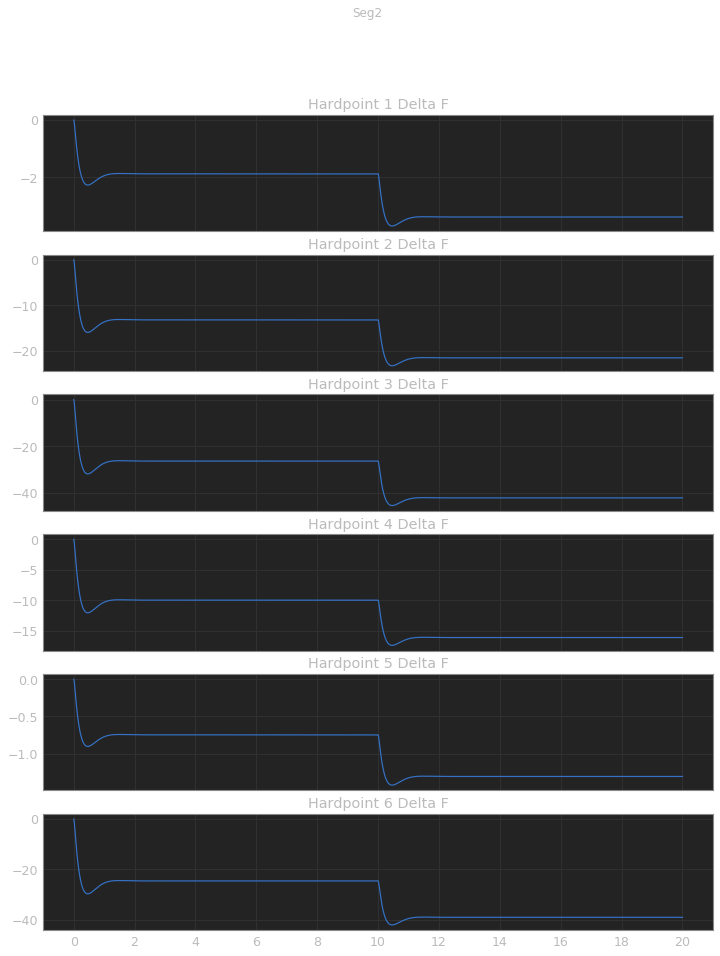

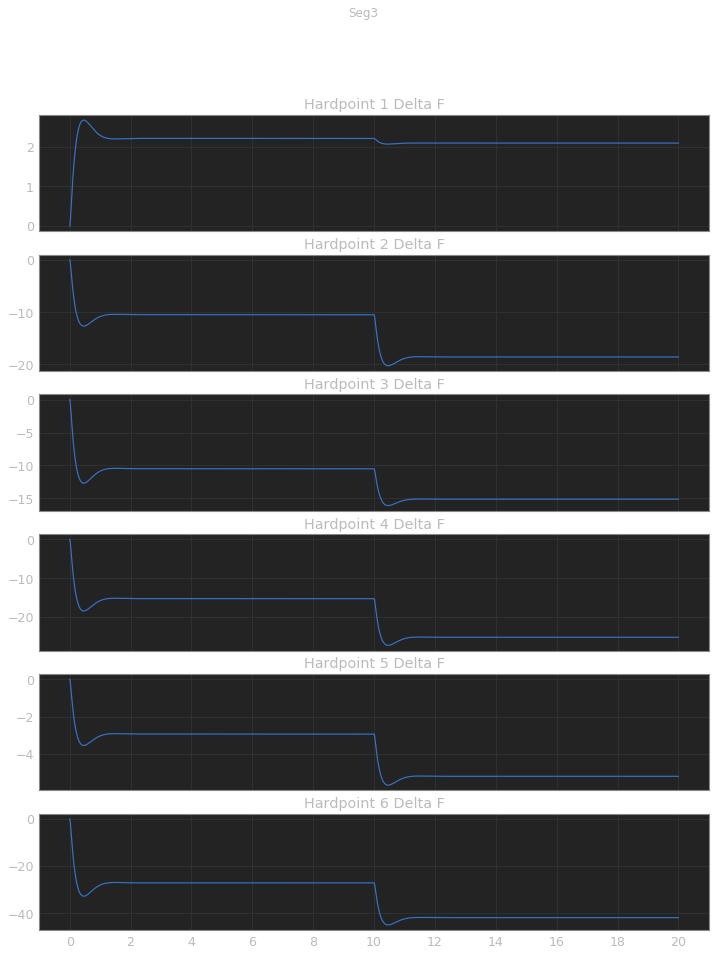

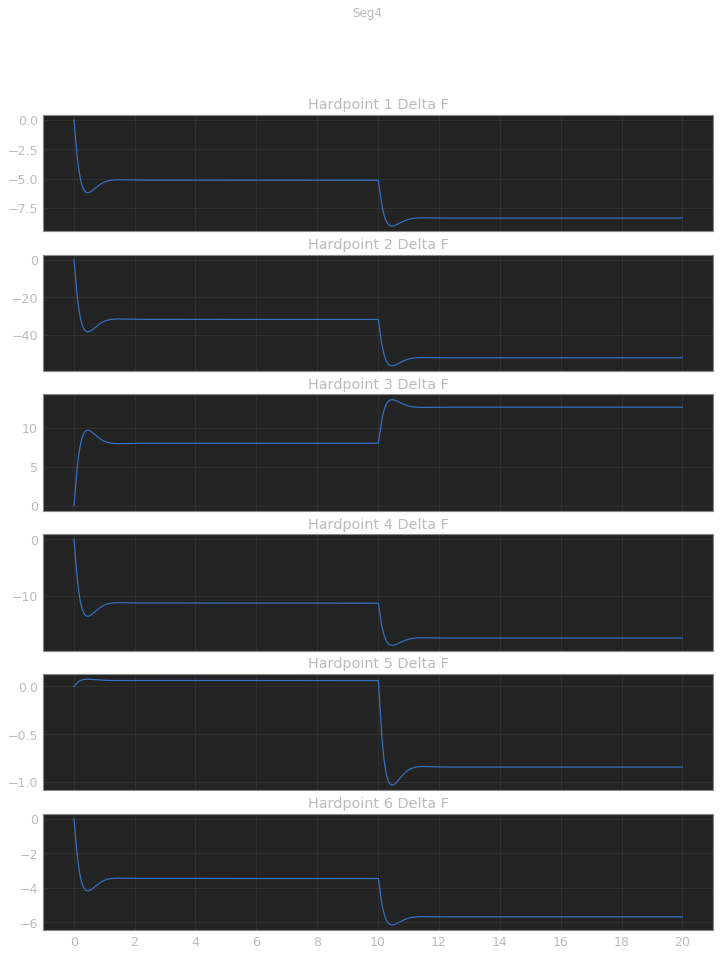

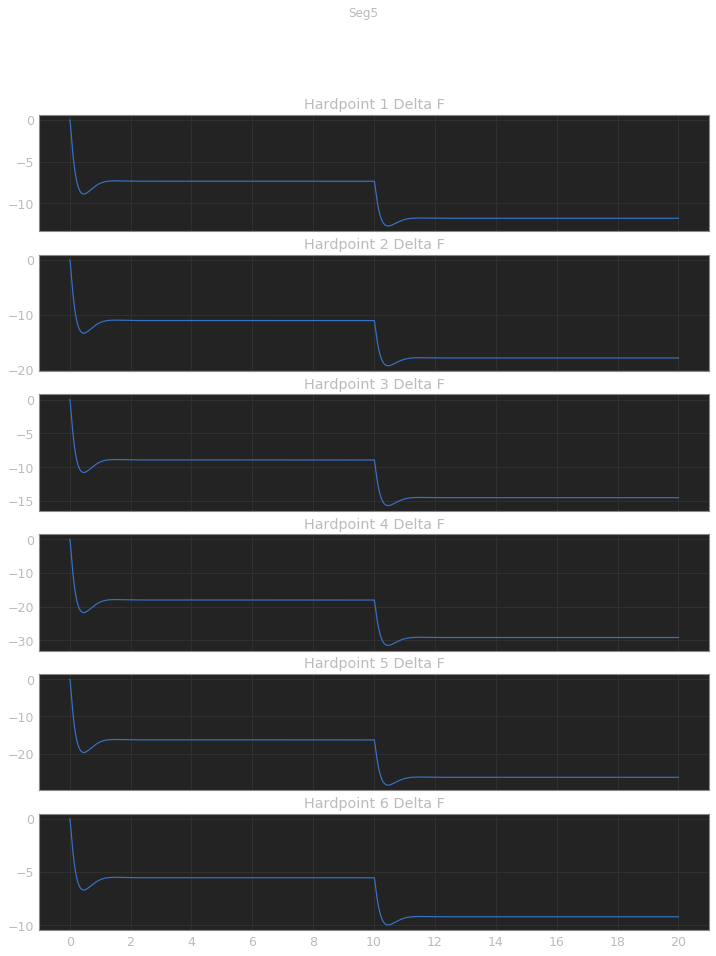

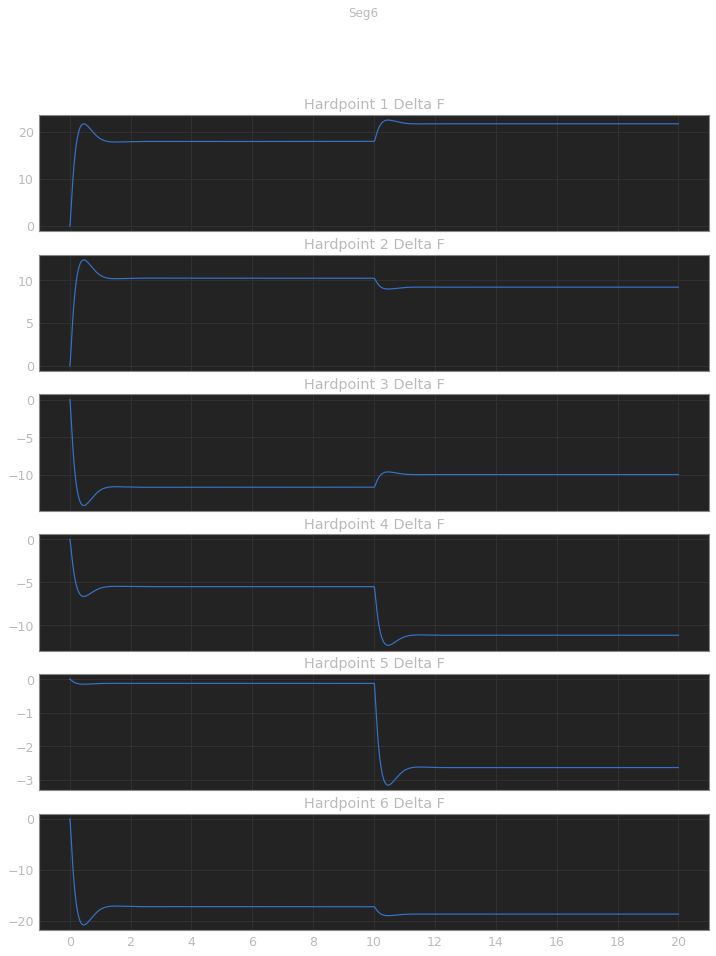

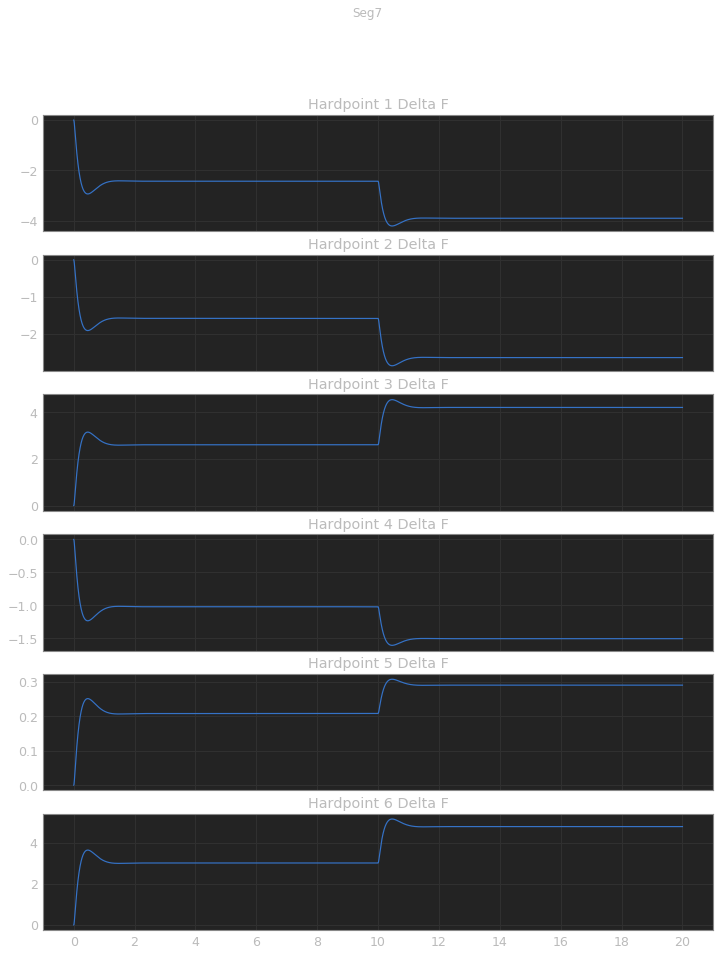

In [16]:
seg = list(range(7))
hp_ = list(range(6))
for s in seg:
    fig, ax = plt.subplots(6, 1, sharex=True, figsize=(12,15))
    fig.suptitle('Seg'  + str(s + 1), fontsize=12, horizontalalignment = 'center',
                verticalalignment = 'top')
    for hp in hp_:
        ax[hp].plot(time_1, HP_F[:,s * 6  + hp])
        ax[hp].set_xticks(xticks)
        ax[hp].set_title(f'Hardpoint {hp + 1} Delta F')
        #ax[hp].legend(loc="best")
    plt.show()

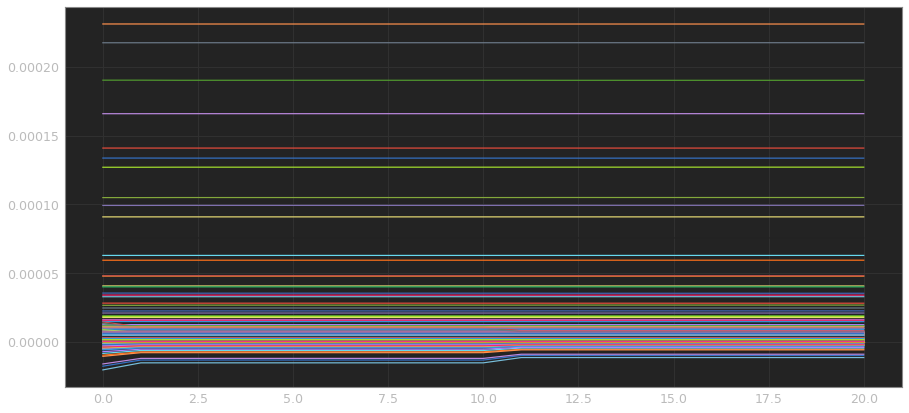

In [17]:
wfs = logs['wfs48']['M12_RBM'].timeSeries[1]

plt.figure(figsize = (15,7))
plt.plot(wfs)
plt.show()

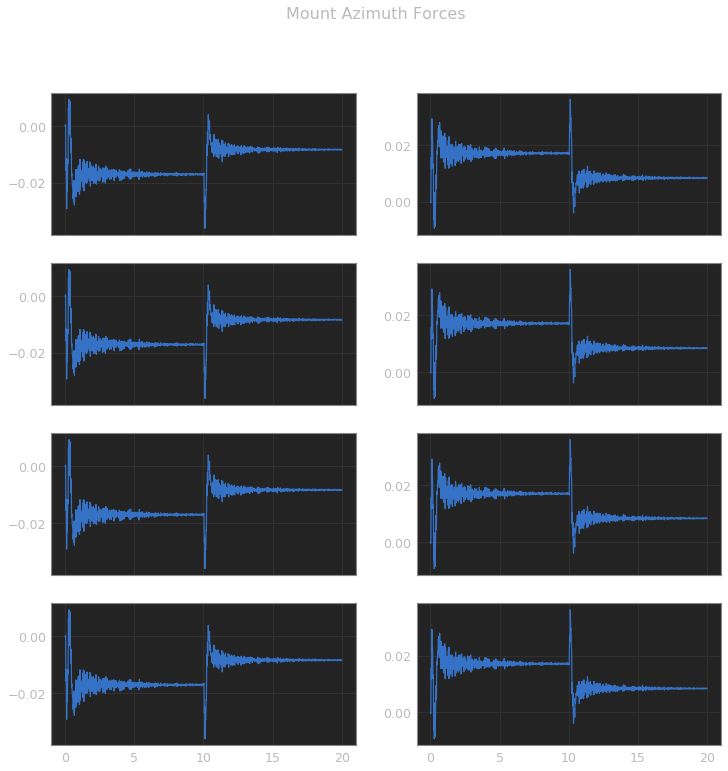

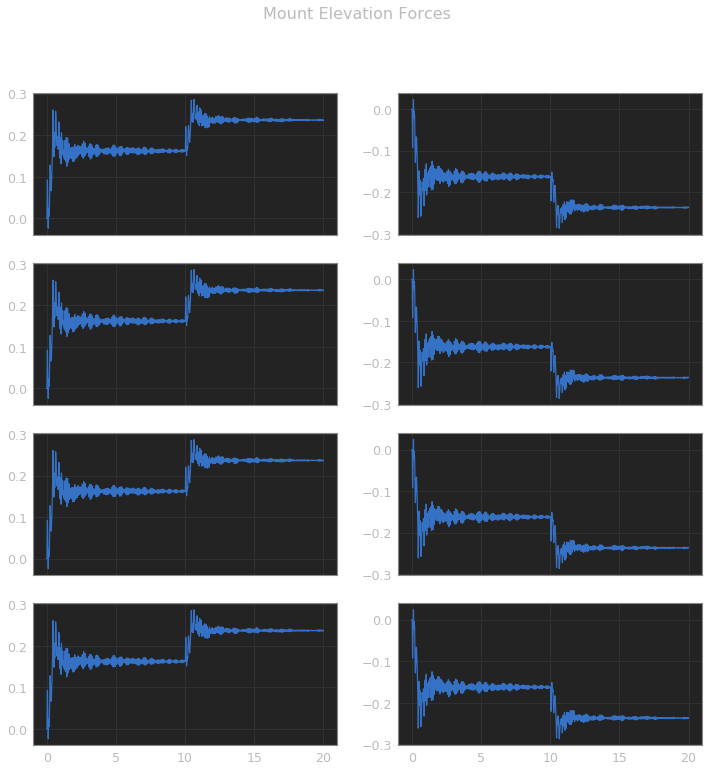

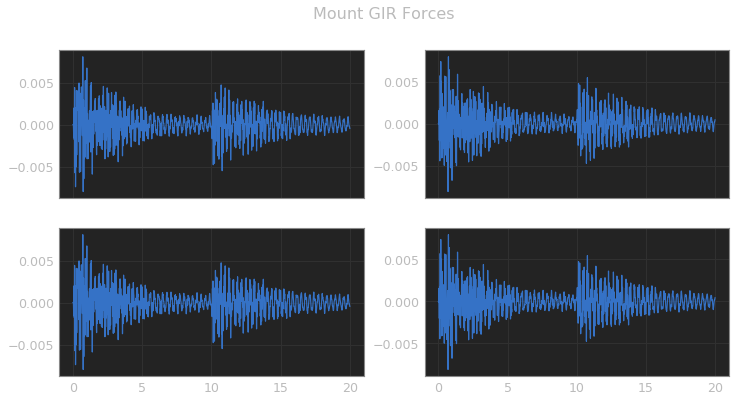

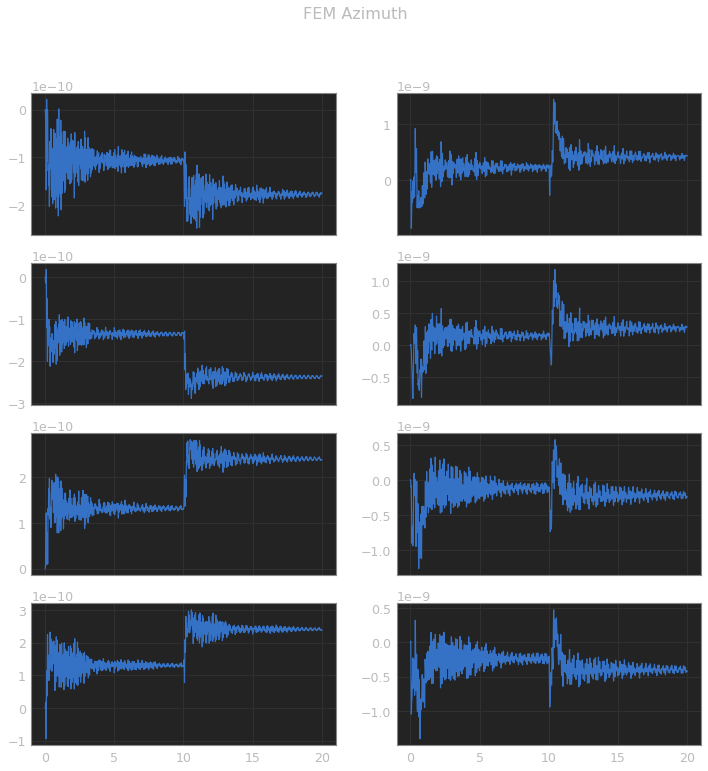

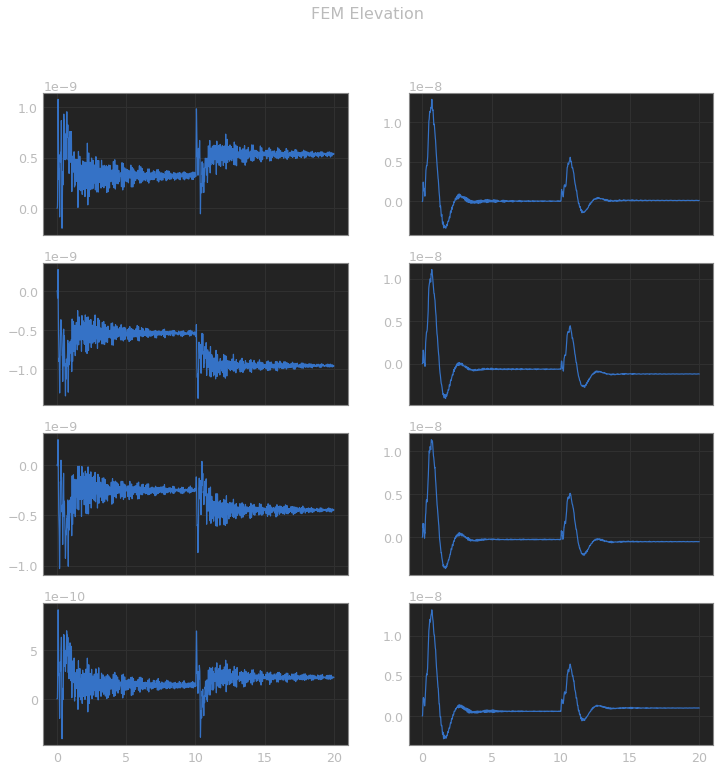

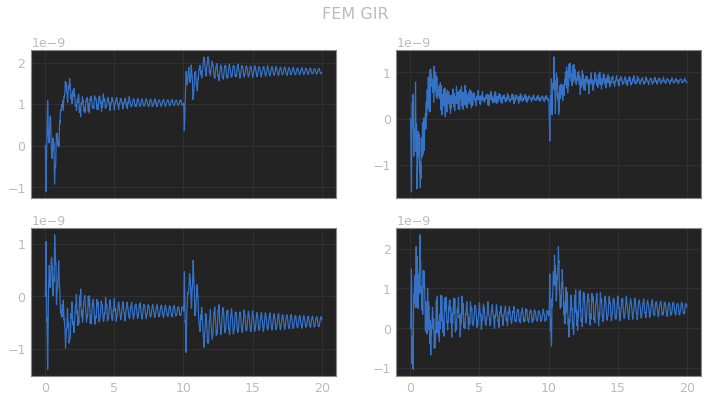

In [18]:
fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('Mount Azimuth Forces', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,Mount_Az[:,m])
plt.show()

fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('Mount Elevation Forces', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,Mount_El[:,m])
plt.show()

fig, ax = plt.subplots(2,2, sharex=True, figsize=(12,6))
fig.suptitle('Mount GIR Forces', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(4):
    ax[m%2,m//2].plot(time_1,Mount_GIR[:,m])
plt.show()


fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('FEM Azimuth', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,FEM_Az[:,m])
plt.show()

fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('FEM Elevation', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,FEM_El[:,m])
plt.show()

fig, ax = plt.subplots(2,2, sharex=True, figsize=(12,6))
fig.suptitle('FEM GIR', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(4):
    ax[m%2,m//2].plot(time_1,FEM_GIR[:,m])
plt.show()

### Bending Modes
---

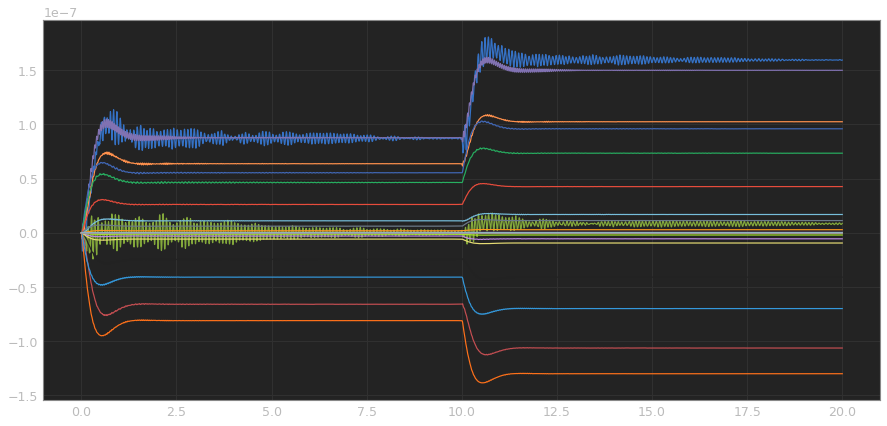

In [19]:
BM = logs['FEM']['Bending Modes'].timeSeries[1].T
t = logs['FEM']['Bending Modes'].timeSeries[0]

plt.figure(figsize = (15,7))
plt.plot(t, BM[:,:,0])
plt.show()

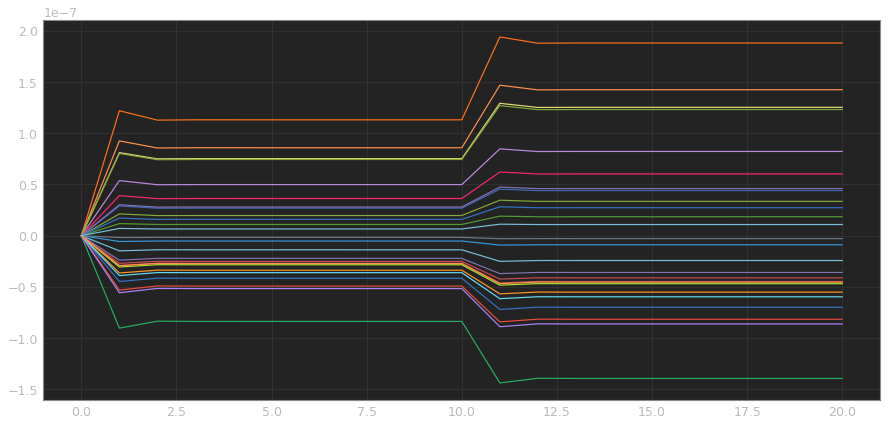

In [32]:
BM_static = logs['BendingModesStatic0']['M1 BM'].timeSeries[1].T

plt.figure(figsize = (15,7))
plt.plot(time_2000, BM_static[:,:,0])
plt.show()

In [ ]:
import scipy.io as sio
transformation_path = '../database/bendingmodes/old_consolidated_SSBM_transformation_matrices.mat'
load_args = {'squeeze_me' : True, 'mat_dtype' : True}
Q_seg = sio.loadmat(transformation_path,variable_names = ['Q_incell'],
                   **load_args)['Q_incell']
U_seg = sio.loadmat(transformation_path, variable_names = ['U_incell'],
                    **load_args)['U_incell']

In [ ]:
import importlib
import utils
try:
    importlib.reload(utils)
except:
    pass
from utils import LargeCompute

lc = LargeCompute(onCuda = True)

disp_ptt_ = lc.load_disp('variables/states.dat', './dos/Integrated', int(duration) )

indx = [x*742 for x in range(1,7)]
disp_ptt = np.array(np.split(disp_ptt_, indices_or_sections = indx, axis = 0),
                     dtype = object)

disp = np.empty(7, dtype = object)
ptt = np.empty(7, dtype = object)
for i in range(7):
    disp[i], ptt[i] = lc.remove_ptt(Q_seg[i], disp_ptt[i])

In [ ]:
rec_disp = np.empty(7, dtype = object)
for i in range(7):
    rec_disp[i] = lc.bm_to_disp_time(U_seg[i][:,0:27] ,BM[:,:,i].T)

plt.figure(figsize = (10,10))
plt.subplot(211)
plt.plot(rec_disp[5][200,:])
plt.plot(disp[5][200,:], '--')
plt.subplot(212)
plt.plot(rec_disp[5][200,:] - disp[5][200,:])
plt.show()

displacements_ptt[:,:] = np.dot(C, states)

indc1 = [x*742 for x in range(1,7)]
seg_displacements_ptt_ = np.split(displacements_ptt,
                                             indices_or_sections = indc1,
                                             axis = 0)

disp_ptt = bm_utils.load_displacements('variables/states.dat',
                                       './dos/Integrated',
                                       int(duration))

In [ ]:
from bendingModes_utils import bending_modes
bm_utils = bending_modes(transformation_path)

fig, ax = plt.subplots(1,2, figsize = (20, 8))
ax1, ax2 = ax
bm_utils.plot_surf(rec_disp[1:2], 0, 300000)
#bm_utils.plot_surf(rec_disp, 0, 25000)

In [ ]:
rec_disp.shape